In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import cv2 as cv
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans

import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
url = 'https://raw.githubusercontent.com/Dmytro-Mld/Data-Analysis-Lab1/refs/heads/main/Dataset/StudentsPerformance.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


PCA

In [7]:
X = df.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], axis = 1) #ці фічі можна було б нормалізувати,
                                                                                                                       #але у даному випадку ми залишили лише
                                                                                                                       #числові фічі

In [8]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [9]:
pca = PCA()
X_pca = pca.fit_transform(X_std)

In [10]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

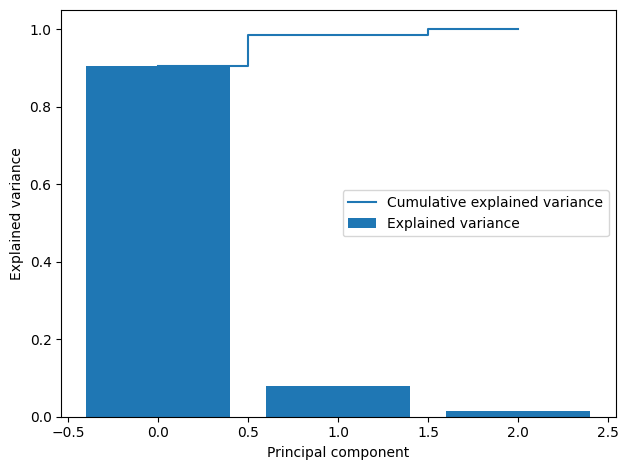

In [11]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [13]:
y = df['writing score']

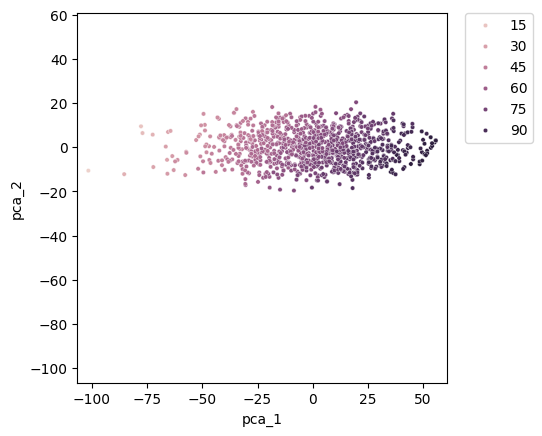

In [14]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

tSNE

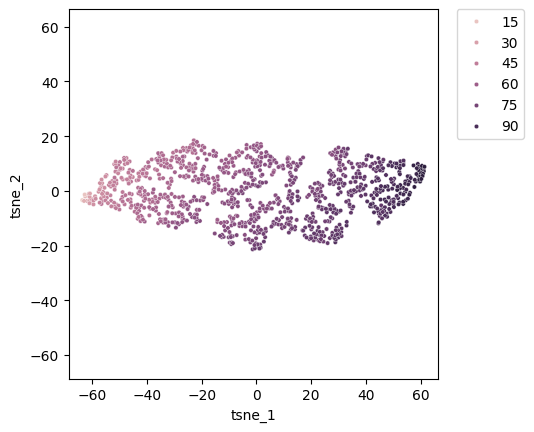

In [15]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

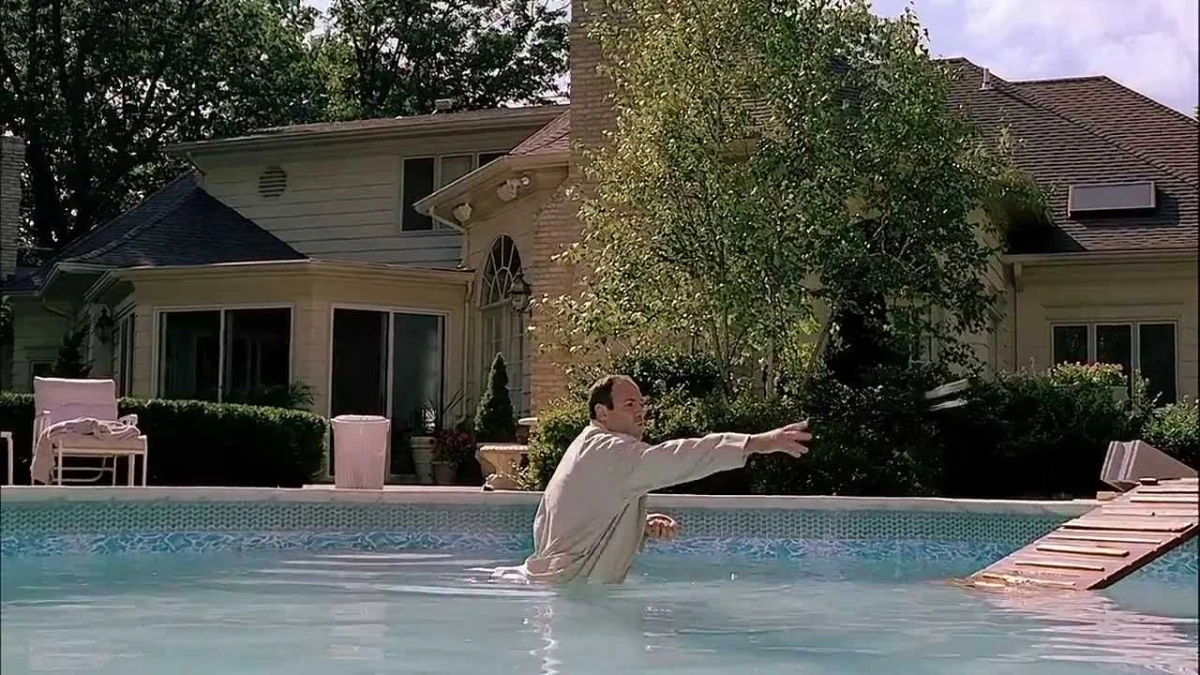

In [30]:
url = '/content/Sopranos.jpg'

Sopranos = cv.imread(url)
cv2_imshow(Sopranos)
reshapedLHouse = np.reshape(Sopranos, ((Sopranos.shape[0] * Sopranos.shape[1]), 3)) #утворюємо новий масив, де кожен рядок - піксель представлений трьома кольорами

In [32]:
def KMeansQant(clus):  #quantization/clustering
  KMeansLHouse = KMeans(n_clusters=clus, n_init=10)
  target = KMeansLHouse.fit_predict(reshapedLHouse)
  color_space = KMeansLHouse.cluster_centers_ #набір основних кольорів
  output_image = np.reshape(color_space.astype("uint8")[target], (Sopranos.shape[0], Sopranos.shape[1], 3))  #відновлюється форма зображення
  final_image = cv.cvtColor(output_image, cv.COLOR_BGR2RGB)
  plt.imshow(final_image)
  plt.axis("off") #вимикає осі координат

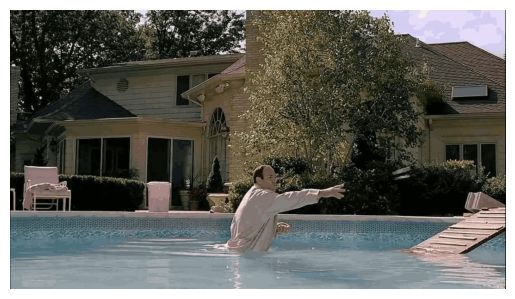

In [33]:
KMeansQant(64)

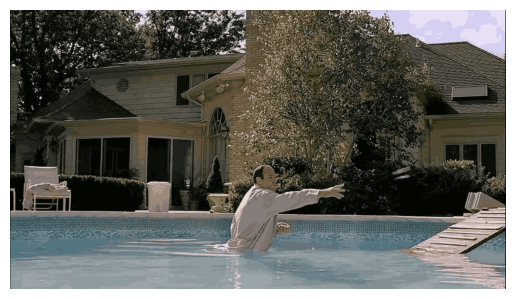

In [34]:
KMeansQant(32)

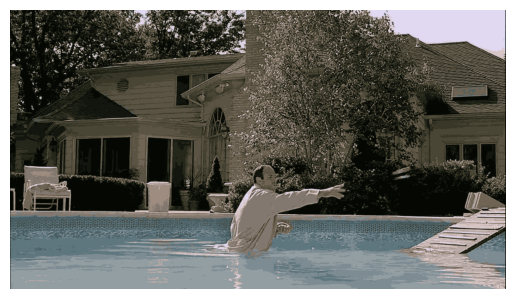

In [35]:
KMeansQant(16)

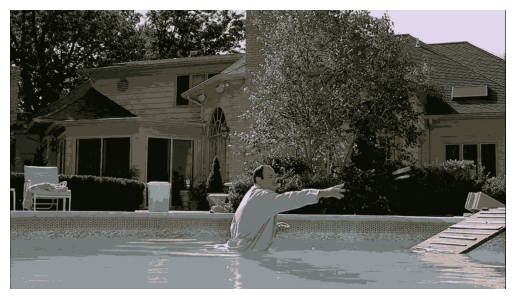

In [36]:
KMeansQant(8)

In [3]:
url = 'https://raw.githubusercontent.com/Dmytro-Mld/Data-Analysis/refs/heads/main/Lab%202/Movies%20genre/movies.csv'
dfMovie = pd.read_csv(url)

In [18]:
dfMovie.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [19]:
dfMovie.head()

,movieId,title,genres
0,1,Toy Story (1995),adventure animation children comedy fantasy
1,2,Jumanji (1995),adventure children fantasy
2,3,Grumpier Old Men (1995),comedy romance
3,4,Waiting to Exhale (1995),comedy drama romance
4,5,Father of the Bride Part II (1995),comedy


In [20]:
stop_words = set(stopwords.words('english'))
print(dfMovie.at[1,'genres'])
for i in range (len(dfMovie)):
  text = dfMovie.at[i,'genres']
  text = text.lower()
  text = re.sub(",@\S+", " ", text)
  text = re.sub("https*\S+", " ", text)
  text = re.sub("#\S+", " ", text)
  text = re.sub("\d", " ", text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\n', ' ', text)
  text = re.sub(' \w ', ' ', text)
  text = re.sub(' \w{2} ', ' ', text)
  text = re.sub('\s{2,}',' ', text)
  text = ' '.join([word for word in text.split(' ') if word not in stop_words])
  dfMovie.at[i,'genres'] = text
print(dfMovie.at[1,'genres'])

adventure children fantasy
adventure children fantasy


In [26]:
def visualize(label):
    text = ''
    for msg in dfMovie[dfMovie['genres'] == label]['title']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="black").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

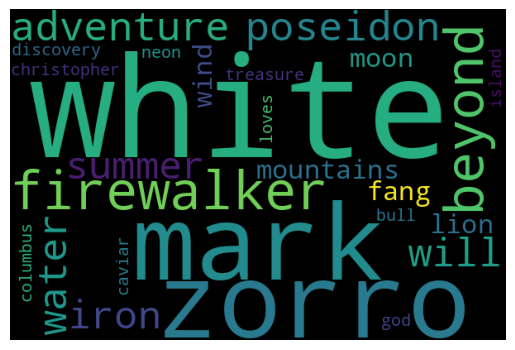

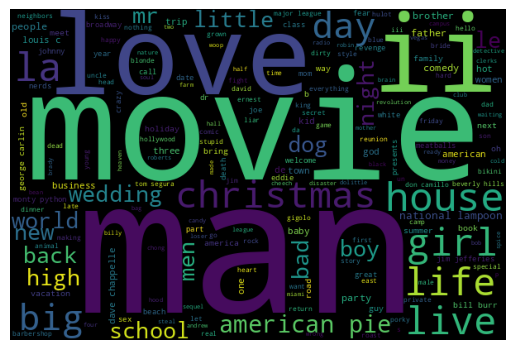

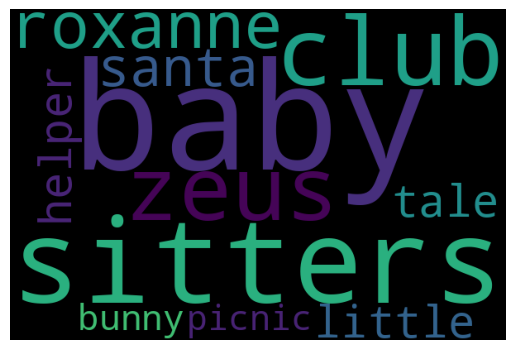

In [28]:
visualize('adventure')
visualize('comedy')
visualize('children')

In [37]:
x_train, x_test, y_train, y_test = train_test_split(dfMovie['title'], dfMovie['genres'], test_size=0.20)
tfidf_vectorizer = TfidfVectorizer(max_df=1000, min_df=15)
x_tfidf_train = tfidf_vectorizer.fit_transform(x_train)
x_tfidf_test =  tfidf_vectorizer.transform(x_test)

In [38]:
clf = MultinomialNB(alpha=0.1)
clf.fit(x_tfidf_train, y_train)
y_pr = clf.predict(x_tfidf_test)
print(classification_report(y_test, y_pr))

                                                             precision    recall  f1-score   support

                                             genres listed        0.00      0.00      0.00         8
                                                     action       0.00      0.00      0.00        17
                                           action adventure       0.00      0.00      0.00         8
                                 action adventure animation       0.17      0.50      0.25         2
         action adventure animation children comedy fantasy       0.00      0.00      0.00         2
            action adventure animation children comedy imax       0.00      0.00      0.00         1
         action adventure animation children comedy romance       0.00      0.00      0.00         1
                 action adventure animation comedy thriller       0.00      0.00      0.00         1
                           action adventure animation drama       0.00      0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
print(confusion_matrix(y_test, y_pr))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [40]:
svc = SVC(C=1, gamma = 1, kernel = 'rbf')
svc.fit(x_tfidf_train, y_train)
y_pred = svc.predict(x_tfidf_test)
print(classification_report(y_test, y_pred))

                                                             precision    recall  f1-score   support

                                             genres listed        0.00      0.00      0.00         8
                                                     action       0.00      0.00      0.00        17
                                           action adventure       0.00      0.00      0.00         8
                                 action adventure animation       0.25      0.50      0.33         2
         action adventure animation children comedy fantasy       0.00      0.00      0.00         2
            action adventure animation children comedy imax       0.00      0.00      0.00         1
         action adventure animation children comedy romance       0.00      0.00      0.00         1
                 action adventure animation comedy thriller       0.00      0.00      0.00         1
                           action adventure animation drama       0.00      0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
print(confusion_matrix(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
